# Data-X IEOR 290: HW 4
### Ankit Dutta
#### SID : 3032167048


# Part 1 "Real time" data stream of stock prices

In part 1 you are going to design your own "real time" (batch) stock price prediction and visualization application.



# Q1:

First we have a pre-written program for you (that you are welcome to modify - but it works as is). It fetches "real time" stock data from Google. The program is given to you as it covers some topics that we have not touched upon in class - like user defined input, defensive programming, opening a connection to a url, parsing json data to a dictionary, and writing to a CSV file.

Your task is to run the program below and collect 100 data samples of stock prices for three user defined stocks. There should be an approximate time delay of ten seconds between the updates.

**Note:** The data collection has to be done on a weekday between 9.30am - 4pm (Eastern time), in order for the stock prices to be volatile  - as this is the open trade window for NASDAQ. If you want to start Q2-Q5 before you have collected data, you can access a preliminary CSV file here: https://www.dropbox.com/s/bbf5v325byt3qr6/stock_data_example.csv?dl=1

In [1]:
## Python 3 version of HW4
## Load packages
import urllib.request
import datetime as dt
import time
import json
import os.path
import sys

# NASDAQ STOCKS BASE URL
base_url = 'http://finance.google.com/finance/info?client=ig&q=NASDAQ:' 
# Stock examples: AAPL, TSLA, GOOGL


# Define number of stocks, total updates, and time between updates
def assign(string):
    ## Example of defensive programming, input must be positive integer
    
    while True:
        try:
            var = int(input(string+': ')) # convert string input to integer
        except:
            print(string + ' must be positive integer, try again')
            continue
        if var < 1:
            print(string + ' must be a positive integer, try again')
            continue
        break
        
    return var


nbr_of_stocks = assign("Number of stocks")
nbr_of_updates = assign("Number of total stock updates")
update_time = assign("Approximate time delay (seconds) between updates")


# Define stock names (as stock ticker / stock symbol), store in dictionary
stocks = dict()
for i in range(nbr_of_stocks):
    stock_key = 'stock'+str(i)
    
    # User input, define stock with a certain stock symbol e.g. GOOGL, TSLA, AAPL
    stocks[stock_key] = input("Stock"+str(i+1)+" Code: ") 


def get_stock_value(stock):
    '''
    Fetch stock value for stock ticker / stock symbol
    '''
    
    url = base_url + stock # url to stock
    
    # Defensive programming. Raise error if stock symbol does not exist
    try:
        url_socket = urllib.request.urlopen(url)
    except:
        print('WRONG STOCK CODE "' + stock + '"')
        sys.exit()
    
    data = url_socket.read().decode('utf-8') # read in the URL data as a string, decode from bytes
    
    start_idx = data.find('{') # starting index of json part of the string
    end_idx = data.find('}') # ending index of json part of the string
    
    info = json.loads(data[start_idx:end_idx+1]) #load json data to a dictionary
    stock_price = info['l'] # stock prices are stored under key 'l'
    
    return stock_price


# Create / Overwrite CSV file and add header
f = open('stock_data.csv','w')
header = 'Time Stamp,'+','.join(stocks.values())

f.write(header+'\n') # write header to CSV file stock_data.csv, add new line


def current_time_str():
    '''
    Get current time as a string: Format "Year-Month-Date Hour:Minute:Second"
    '''
    t = dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    return t


print('\n\n\nSTOCK PRICES (USD):\n') # Print output, to see that script is running


i=0
while nbr_of_updates > i:
    '''
    Fetch stock info with given time interval and write to CSV
    Store the values in a list
    '''
    
    # store stock values in a list
    vals = list()
    for stock in stocks.values():
        val = get_stock_value(stock)
        vals.append(val)
        
        print(stock, ':', val)

        
    t = current_time_str() # current date and time as string
    print('Fetched at', t,'\n')
    
    
    # write time and stock values as a CSV on a seperate line
    f.write(t+','+','.join(vals)+'\n') 
    i+=1 # iterate
    time.sleep(update_time) # time (in seconds) before the loop runs again


f.close() # close file connection

print('\nDone!')

Number of stocks: 3
Number of total stock updates: 100
Approximate time delay (seconds) between updates: 10
Stock1 Code: AAPL
Stock2 Code: GOOGL
Stock3 Code: TSLA



STOCK PRICES (USD):

AAPL : 135.24
TSLA : 272.25
GOOGL : 839.78
Fetched at 2017-02-16 10:01:21 

AAPL : 135.22
TSLA : 272.30
GOOGL : 839.78
Fetched at 2017-02-16 10:01:34 

AAPL : 135.21
TSLA : 272.36
GOOGL : 839.78
Fetched at 2017-02-16 10:01:47 

AAPL : 135.22
TSLA : 272.39
GOOGL : 839.63
Fetched at 2017-02-16 10:01:57 

AAPL : 135.21
TSLA : 272.33
GOOGL : 839.63
Fetched at 2017-02-16 10:02:09 

AAPL : 135.22
TSLA : 272.40
GOOGL : 839.63
Fetched at 2017-02-16 10:02:19 

AAPL : 135.22
TSLA : 272.47
GOOGL : 839.65
Fetched at 2017-02-16 10:02:30 

AAPL : 135.21
TSLA : 272.44
GOOGL : 839.65
Fetched at 2017-02-16 10:02:41 

AAPL : 135.21
TSLA : 272.14
GOOGL : 839.65
Fetched at 2017-02-16 10:02:53 

AAPL : 135.20
TSLA : 272.18
GOOGL : 839.65
Fetched at 2017-02-16 10:03:03 

AAPL : 135.17
TSLA : 272.28
GOOGL : 839.65
Fetched at

#### Part 1 (continued)
# Q2: Simple stock statistics

* 1: Read in the data stored in stock_data.csv to a DataFrame called **df**.


* 2: Convert the 'Time Stamp' column to datetime objects, specifying the year, month, date, hour, minute, second in the format:

    `%Y-%m-%d %H:%M:%S`
    
    Store the datetime objects as the index of **df** (hint: Lookup pandas DatetimeIndex) . Then, drop the 'Time Stamp' column.


* 3: Calculate the OLHC for each stock (Open, Low, High, Close values). Note: Let Open time be the first time stamp in your data set and Closing time the last time stamp in your data set.


* 4: Calculate the mean stock price for each stock, and it's standard deviation.


* 5: Calculate the total change in price over the time period (Closing Value - Open Value)


* 6: Create a variable called **t**, that is an array with every time stamp in seconds after the first stock data was collected. I.e.,

    `t[0] = 0,.., t[99] = 10*100 + running time`. 

In [1]:
## Input answers here ##
import numpy as np
import pandas as pd
## Input answers here ##
df= pd.read_csv('stock_data.csv')
from datetime import datetime
df['Time Stamp']=pd.to_datetime(df['Time Stamp'],format='%Y-%m-%d %H:%M:%S')

df=df.set_index('Time Stamp')



#Calculate the OLHC for each stock (Open, Low, High, Close values). 
#Note: Let Open time be the first time stamp in your data set and Closing time the last time stamp in your data set.

for i in df.columns:
    print('Open of',i,'is',df[i][0])
    print('Close of',i,'is',df[i][-1])
    print('Max of',i,'is',df[i].max())
    print('Min of',i,'is',df[i].min())
    
#Calculate the mean stock price for each stock, and it's standard deviation.
for i in df.columns:
        print('Mean stock price of',i,'is:',df[i].mean())
        print('Standard Deviation of',i,'is:',df[i].std())
#Calculate the total change in price over the time period (Closing Value - Open Value)
for i in df.columns:
    Change=df[i][-1]-df[i][0]
    print('Change',i,'is:',Change)
#Create a variable called t, that is an array with every time stamp in seconds after the first stock data was collected.
#t=[]
#for i in range(0,len(df.index)):
 #   t.append((df.index[i]-df.index[0]).total_seconds())
    #i+=1
secs=df.index
difference=secs-secs[0]
t=difference.total_seconds()
t

Open of AAPL is 135.24
Close of AAPL is 135.29
Max of AAPL is 135.32
Min of AAPL is 135.16
Open of TSLA is 272.25
Close of TSLA is 271.56
Max of TSLA is 272.47
Min of TSLA is 271.15
Open of GOOGL is 839.78
Close of GOOGL is 840.99
Max of GOOGL is 840.99
Min of GOOGL is 839.58
Mean stock price of AAPL is: 135.24690000000007
Standard Deviation of AAPL is: 0.043939696968652076
Mean stock price of TSLA is: 271.80090000000007
Standard Deviation of TSLA is: 0.3375134714857233
Mean stock price of GOOGL is: 840.1212
Standard Deviation of GOOGL is: 0.3901936323251201
Change AAPL is: 0.05
Change TSLA is: -0.69
Change GOOGL is: 1.21


array([    0.,    13.,    26.,    36.,    48.,    58.,    69.,    80.,
          92.,   102.,   113.,   124.,   136.,   148.,   159.,   171.,
         182.,   193.,   204.,   216.,   227.,   237.,   249.,   260.,
         272.,   284.,   295.,   307.,   318.,   329.,   340.,   351.,
         362.,   373.,   384.,   395.,   406.,   419.,   431.,   443.,
         456.,   470.,   481.,   493.,   503.,   514.,   529.,   541.,
         552.,   563.,   576.,   588.,   600.,   612.,   623.,   635.,
         646.,   658.,   670.,   681.,   692.,   703.,   716.,   727.,
         747.,   759.,   770.,   781.,   792.,   804.,   817.,   830.,
         841.,   852.,   862.,   873.,   885.,   896.,   908.,   920.,
         930.,   942.,   954.,   964.,   975.,   987.,   999.,  1011.,
        1022.,  1033.,  1045.,  1057.,  1068.,  1079.,  1090.,  1101.,
        1112.,  1123.,  1134.,  1145.])

# Q3: Plotting

* Create a graph over the stock prices with matplotlib. It should have three subplots, each showing one stock's price change over the time period. The y-axis should show the stock price and the x axis should be the **t** variable from Q1.5, i.e. the number of seconds after the first stock price was fetched (t[0] = 0).  

Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)

<img style="width: 500px" src="https://www.dropbox.com/s/8036uyug8lq17fk/hw4_plot1.png?dl=1">

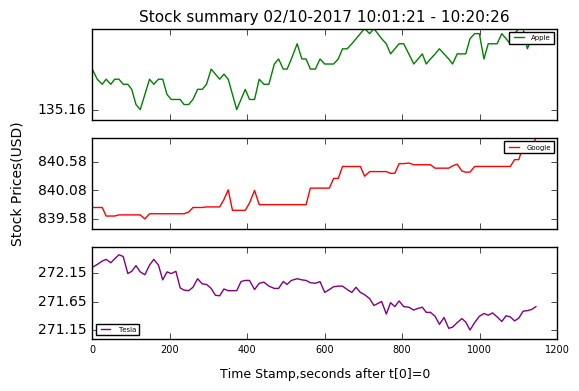

In [2]:
## Input answer here ##
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3,ncols=1)

#plt.plot(t,df['AAPL'])
ax[0].plot(t, df['AAPL'],color='green', label='Apple')
ax[0].yaxis.set_ticks(np.arange(135.16,135.32,0.5))
ax[0].ticklabel_format(useOffset=False)
plt.setp(ax[0].get_xticklabels(), visible = False)
plt.setp(ax[0].get_xticklabels(), fontsize =7)
ax[0].legend(loc = 1, labels = ['Apple'], fontsize = 5)

ax[1].plot(t, df['GOOGL'],color='red',label='Google')
ax[1].yaxis.set_ticks(np.arange(839.58,840.99,0.5))
plt.setp(ax[1].get_xticklabels(), visible = False)
ax[1].legend(loc = 1, labels = ['Google'], fontsize = 5)
plt.setp(ax[1].get_xticklabels(), fontsize =7)


ax[2].plot(t,df['TSLA'],color='purple',label='Tesla')
ax[2].yaxis.set_ticks(np.arange(271.15,272.47,0.5))
ax[2].ticklabel_format(useOffset=False)
plt.setp(ax[2].get_xticklabels(), fontsize =7)
ax[2].legend(loc = 3, labels = ['Tesla'], fontsize = 5)

plt.xlabel('Time Stamp,seconds after t[0]=0', fontsize = 9, labelpad =10)
ax[1].set_ylabel('Stock Prices(USD)', fontsize = 10, labelpad = 10)
ax[0].set_title('Stock summary 02/10-2017 10:01:21 - 10:20:26', fontsize = 11)
plt.show()

# Q4: Prediction

* 1: Fit three Linear Regression models, each model should use all the data collected for one stock, i.e., fit one model for each of the stocks. 


* 2: Use the models from Q4.1 to predict what the stock price would be for each stock ten minutes after the Closing time.


* 3: Calculate the Mean Squared Error (MSE) for your stock price prediction models, i.e. calculate 3 MSEs, one for every stock prediction model.


* 4: Form three new Regression models, using only the 30 first data samples collected, i.e. dependent variables **stock_price[:30]** and predictors **t[:30]**. Use these models to predict the stock price for the three stocks at the time stamp **t[59]**, then compare your predictions to the collected stock value at that time (i.e., **stock_price[59]**).



In [3]:
## Input answer here ##
#Fit three Linear Regression models, each model should use all the data collected for one stock, i.e., fit one model for each of the stocks.
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
apple = df['AAPL']
google=df['GOOGL']
tesla=df['TSLA']
tx=t.reshape(-1,1)
t=sm.add_constant(t)
modelx=linear_model.LinearRegression()
olsmod1 = sm.OLS( apple,t)
olsres1 = olsmod1.fit()
print(olsres1.summary())

olsmod2 = sm.OLS( google,t)
olsres2 = olsmod2.fit()
print(olsres2.summary())

olsmod3 = sm.OLS( tesla,t)
olsres3 = olsmod3.fit()
print(olsres3.summary())


#Use the models from Q4.1 to predict what the stock price would be for each stock ten minutes after the Closing time.
aplpred=olsres1.predict(t[99]+[0,600])
gglpred=olsres2.predict(t[99]+[0,600])
tslpred=olsres3.predict(t[99]+[0,600])
print('Apple at 10 mins post:',aplpred)
print('Google at 10 mins post:',gglpred)
print('Tesla at 10 mins post:',tslpred)

#Calculate the Mean Squared Error (MSE) for your stock price prediction models, i.e. calculate 3 MSEs, one for every stock prediction model
print('MSE Apple:',olsres1.mse_total)
print('MSE Google:',olsres2.mse_total)
print('MSE Tesla:',olsres3.mse_total)

#
error1=mean_squared_error(df['AAPL'],modelx.fit(tx,df['AAPL']).predict(tx))
print(error1)
error2=mean_squared_error(df['GOOGL'],modelx.fit(tx,df['GOOGL']).predict(tx))
print(error2)
error3=mean_squared_error(df['TSLA'],modelx.fit(tx,df['TSLA']).predict(tx))
print(error3)

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     188.6
Date:                Thu, 16 Feb 2017   Prob (F-statistic):           1.44e-24
Time:                        14:03:00   Log-Likelihood:                 224.75
No. Observations:                 100   AIC:                            -445.5
Df Residuals:                      98   BIC:                            -440.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        135.1867      0.005   2.66e+04      0.0

In [4]:
#Form three new Regression models, using only the 30 first data samples collected, i.e. dependent variables stock_price[:30] \
#and predictors t[:30]. Use these models to predict the stock price for the three stocks at the time stamp t[59],
#then compare your predictions to the collected stock value at that time (i.e., stock_price[59]).
t_train = t[:30]
appletrain = apple[:30] 

googletrain=google[:30]

teslatrain=tesla[:30]

olsmod1n = sm.OLS(appletrain,t_train)
olsres1n = olsmod1n.fit()
print(olsres1n.summary())

olsmod2n = sm.OLS( googletrain,t_train)
olsres2n = olsmod2n.fit()
print(olsres2n.summary())

olsmod3n = sm.OLS(teslatrain,t_train)
olsres3n = olsmod3n.fit()
print(olsres3n.summary())


print('Predicted value is:',olsres1n.predict(t[58]),'original value is:',apple[58])
print('Predicted value is:',olsres2n.predict(t[58]),'original value is:',google[58])
print('Predicted value is:',olsres3n.predict(t[58]),'original value is:',tesla[58])

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.055
Date:                Thu, 16 Feb 2017   Prob (F-statistic):              0.313
Time:                        14:03:00   Log-Likelihood:                 73.396
No. Observations:                  30   AIC:                            -142.8
Df Residuals:                      28   BIC:                            -140.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        135.2102      0.008   1.74e+04      0.0

# Q5: Plot stock prices together with your 30 data point predictions

* Plot the three stock prices as in Q3, and then plot the Linear Regression predictions that predicted stock prices from your 30 first collected samples. Plot the stock prices and the Linear Predictions in the same figure for the same time period, i.e. **t**. Also add a vertical line to your three plots where **t = t[29]** (i.e. at and before this line are all the data points used to form your 30 data point regression models). 

    Try to make a similar plot as the one below (**Note:** Your solution does not have to look exatly the same)
    
<img style="width: 500px" src="https://www.dropbox.com/s/utj4xozvtdt7xjo/hw4_plot2.png?dl=1">

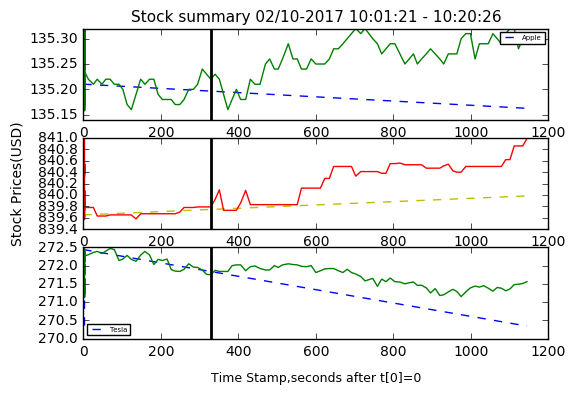

In [5]:
## Input answer here ##
#Plot the three stock prices as in Q3, and then plot the Linear Regression predictions that predicted stock prices 
#from your 30 first collected samples. Plot the stock prices and the Linear Predictions in the same figure for the 
#same time period, i.e. t. Also add a vertical line to your three plots where 
#t = t[29] (i.e. at and before this line are all the data points used to form your 30 data point regression models).
from sklearn import linear_model
model = linear_model.LinearRegression()


fig, ax = plt.subplots(nrows=3,ncols=1)

model.fit(t_train, appletrain)
f = model.predict(t).flatten()
#APPLE
ax[0].plot(t, f, 'b', label='Prediction',linestyle='--')
ax[0].ticklabel_format(useOffset=False)

ax[0].legend(loc = 1, labels = ['Apple'], fontsize = 5)
ax[0].plot(t, df['AAPL'],color='green',label='Apple')
ax[0].axvline(t[29,1],color='black',  lw=2)

#GOOGLE
model.fit(t_train, googletrain)
f = model.predict(t).flatten()
ax[1].plot(t, f, 'y', label='Prediction',linestyle='--')
ax[1].plot(t, df['GOOGL'],color='red',label='Google')
ax[1].axvline(t[29,1], color='black', lw=2)


#Tesla
model.fit(t_train, teslatrain)
f = model.predict(t).flatten()
ax[2].plot(t, f, 'b', label='Prediction',linestyle='--')

ax[2].plot(t,df['TSLA'],color='green',label='Tesla')
ax[2].axvline(t[29,1],color='black',  lw=2)
ax[2].legend(loc = 3, labels = ['Tesla'], fontsize = 5)

plt.xlabel('Time Stamp,seconds after t[0]=0', fontsize = 9, labelpad =10)
ax[1].set_ylabel('Stock Prices(USD)', fontsize = 10, labelpad = 10)
ax[0].set_title('Stock summary 02/10-2017 10:01:21 - 10:20:26', fontsize = 11)
plt.show()


In [6]:
from sklearn import linear_model
from sklearn.metrics import classification_report
model = linear_model.LinearRegression()

modelap=model.fit(t_train, appletrain)
print('Apple at 10 mins post:',modelap.predict(t[59]),'original value is:',apple[58])
y_rf=model.predict(t_train)
modelgg=model.fit(t_train, googletrain)
print('Google at 10 mins post:',modelgg.predict(t[59]),'original value is:',google[58])
y_rf=model.predict(t_train)

modelts=model.fit(t_train,teslatrain)
print('Tesla at 10 mins post:',modelts.predict(t[59]),'original value is:',tesla[58])
y_rf=model.predict(t_train)

Apple at 10 mins post: [ 135.18183942] original value is: 135.29
Google at 10 mins post: [ 839.84835398] original value is: 840.5
Tesla at 10 mins post: [ 271.19244461] original value is: 271.81


C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  Deprecati

# Extra credit

Mathematically derive the optimal weights that minimizes the least square error, **$\epsilon^2$**. I.e. prove that $\hat{\beta} = (X^TX)^{-1}X^TY $ (matrix notation) are the optimal weight estimates for the ordinary least squares (OLS) model, given that $(X^TX)^{-1}$ exists.

$$Y = \hat{\beta} X + \epsilon \text{    see matrix notation below:}$$

.

$$\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{M}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{11} & \cdots & x_{1N} \\
1 & x_{21} & \cdots & x_{2N} \\
\vdots & \ddots & \ddots & \vdots \\
1 & x_{M1} & \cdots & x_{MN}
\end{bmatrix}
*
\begin{bmatrix}
\hat{\beta}_{0} \\
\hat{\beta}_{1} \\
\vdots \\
\hat{\beta}_{N}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} $$

.

<center>The objective is to minimize: $\epsilon^T\epsilon$:</center>


$$\epsilon^T\epsilon = \begin{bmatrix}
\epsilon_{1} & \epsilon_{2} & \cdots & \epsilon_{M} \\
\end{bmatrix}
\begin{bmatrix}
\epsilon_{1} \\
\epsilon_{2} \\
\vdots \\
\epsilon_{M}
\end{bmatrix} = \sum_{i=1}^{M}\epsilon_{i}^{2}
$$


<center> where, </center>

$$\epsilon = Y-\hat{\beta} X$$



In [ ]:
'''
## PLEASE SUBMIT YOUR ANSWER to the EXTRA CREDIT question as 
## a written mathematical proof.
## Either turn it in as a PDF to bcourses (scanned / photo copy) 
## named "[student name]-hw4-ec.pdf"
## or turn it in on paper 
## at the beginning of Lecture 5 with your name and SID
'''